<a href="https://colab.research.google.com/github/seanita/deep_learning_with_python/blob/master/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'dogs-vs-cats/'

print(base_dir)

Mounted at /content/gdrive
/content/gdrive/My Drive/dogs-vs-cats/


In [0]:
import os, shutil

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')

In [0]:
## Create image directories ##
# Create directory for training data
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# os.mkdir(train_cats_dir)
# os.mkdir(train_dogs_dir)

# Create directory for validation data
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# os.mkdir(validation_cats_dir)
# os.mkdir(validation_dogs_dir)

# Create directory for test data
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

# os.mkdir(test_cats_dir)
# os.mkdir(test_dogs_dir)

print(validation_cats_dir)
print(validation_dogs_dir)

/content/gdrive/My Drive/dogs-vs-cats/validation/cats
/content/gdrive/My Drive/dogs-vs-cats/validation/dogs


501

In [0]:
## Parse cat data and add to respective train, vaidation and test folders ##
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(train_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(train_dir, fname) 
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['{}.jpg'.format(i) for i in range(1,501)]
for fname in fnames:
    src = os.path.join(test_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst) 


In [0]:
## Parse dog data and add to respective train, vaidation and test folders ##

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(train_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(train_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
      
fnames = ['{}.jpg'.format(i) for i in range(501,1000)]
for fname in fnames:
    src = os.path.join(test_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    

In [0]:
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))

print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('Total test cat images:', len(os.listdir(test_cats_dir)))
print('Total test dog images:', len(os.listdir(test_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 501
Total validation dog images: 500
Total test cat images: 500
Total test dog images: 501


In [0]:
## Create conv, max pooling and FC layers)

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))        
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))  
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
        
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 15, 15, 128)     

In [0]:
# Setup optimizer #
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
# Convert images into floating point tensors before feeding to network # 
# We will use ImageDataGenerator class provided by keras which automagically 
# turns images into preprocessed tensors.

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape', labels_batch.shape)
    break

Data batch shape: (20, 150, 150, 3)
Labels batch shape (20,)


In [0]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)




Epoch 1/30





100/100 [==============================] - 909s 9s/step - loss: 0.6865 - acc: 0.5520 - val_loss: 0.6834 - val_acc: 0.5400
Epoch 2/30
100/100 [==============================] - 124s 1s/step - loss: 0.6451 - acc: 0.6275 - val_loss: 0.6251 - val_acc: 0.6550
Epoch 3/30
100/100 [==============================] - 123s 1s/step - loss: 0.5972 - acc: 0.6745 - val_loss: 0.6261 - val_acc: 0.6440
Epoch 4/30
100/100 [==============================] - 123s 1s/step - loss: 0.5491 - acc: 0.7175 - val_loss: 0.5888 - val_acc: 0.6820
Epoch 5/30
100/100 [==============================] - 123s 1s/step - loss: 0.5211 - acc: 0.7370 - val_loss: 0.6604 - val_acc: 0.6460
Epoch 6/30
100/100 [==============================] - 123s 1s/step - loss: 0.4916 - acc: 0.7455 - val_loss: 0.5903 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 123s 1s/step - loss: 0.4642 - acc: 0.7755 - val_loss: 0.5770 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 123s 1s

In [0]:
model.save('cats_and_dogs_small_1.h5')

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

In [0]:
# Using data augmentation to prevent overfitting

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

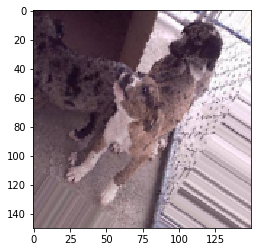

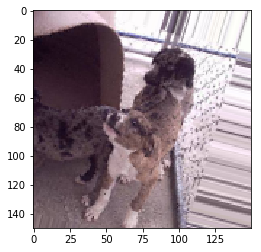

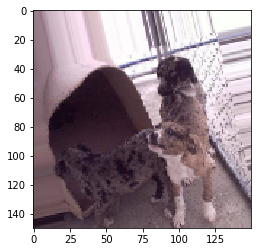

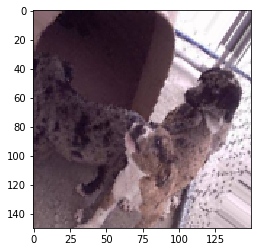

In [0]:
from keras.preprocessing import image

fnames = [os.path.join(train_dogs_dir, fname) for fname in 
          os.listdir(train_dogs_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
    
plt.show()

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/100



100/100 [==============================] - 702s 7s/step - loss: 0.6936 - acc: 0.5150 - val_loss: 0.6802 - val_acc: 0.5596
Epoch 2/100
100/100 [==============================] - 186s 2s/step - loss: 0.6807 - acc: 0.5622 - val_loss: 0.6684 - val_acc: 0.5934
Epoch 3/100
100/100 [==============================] - 187s 2s/step - loss: 0.6675 - acc: 0.5972 - val_loss: 0.6451 - val_acc: 0.6148
Epoch 4/100
100/100 [==============================] - 188s 2s/step - loss: 0.6457 - acc: 0.6119 - val_loss: 0.6243 - val_acc: 0.6443
Epoch 5/100
100/100 [==============================] - 185s 2s/step - loss: 0.6361 - acc: 0.6388 - val_loss: 0.6217 - val_acc: 0.6237
Epoch 6/100
100/100 [==============================] - 188s 2s/step - loss: 0.6204 - acc: 0.6503 - val_loss: 0.5996 - val_acc: 0.6611
Epoch 7/100
100/100 [==============================] - 186s 2s/step - loss: 0.6040 - acc: 0.6672 - val_loss: 0.6137 - val_acc: 0.6523
Epoch 8/100
100/100 [==============================] - 188s 2s/step - loss